In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Fods_data/FoDS-A1.csv')

In [ ]:
df1

,Strength,Temperature,Pressure
0,30.7,240,16
1,24.7,250,18
2,30.6,260,16
3,32.8,240,10
4,20.7,240,20
...,...,...,...
1645,32.5,270,20
1646,38.6,290,14
1647,39.7,290,12
1648,14.6,200,20


In [ ]:
df=(df1-df1.min())/(df1.max()-df1.min())

In [ ]:
df

,Strength,Temperature,Pressure
0,0.504132,0.4,0.6
1,0.338843,0.5,0.8
2,0.501377,0.6,0.6
3,0.561983,0.4,0.0
4,0.228650,0.4,1.0
...,...,...,...
1645,0.553719,0.7,1.0
1646,0.721763,0.9,0.4
1647,0.752066,0.9,0.2
1648,0.060606,0.0,1.0


In [ ]:
df_train,df_test=np.split(df.sample(frac=1,random_state=42),[int(0.7*(len(df)))])

In [ ]:
df_train

,Strength,Temperature,Pressure
482,0.719008,0.9,0.8
65,0.531680,0.5,0.2
926,0.476584,0.7,0.8
481,0.741047,0.9,0.4
23,0.471074,0.2,0.0
...,...,...,...
11,0.776860,0.8,0.0
396,0.443526,0.3,0.4
284,0.352617,0.5,0.8
1066,0.531680,0.6,0.4


In [ ]:
df_test

,Strength,Temperature,Pressure
1346,0.581267,0.5,0.0
1542,0.548209,0.4,0.0
689,0.360882,0.4,0.6
851,0.672176,1.0,0.8
159,0.834711,0.8,0.2
...,...,...,...
1130,0.724518,0.9,0.8
1294,0.669421,0.9,0.6
860,0.159780,0.0,0.6
1459,0.550964,1.0,1.0


In [ ]:
x_train=df_train.drop(labels='Pressure',axis=1)
y_train=df_train['Pressure']

x_test=df_test.drop(labels='Pressure',axis=1)
y_test=df_test['Pressure']

In [ ]:
x_test.shape

(495, 2)

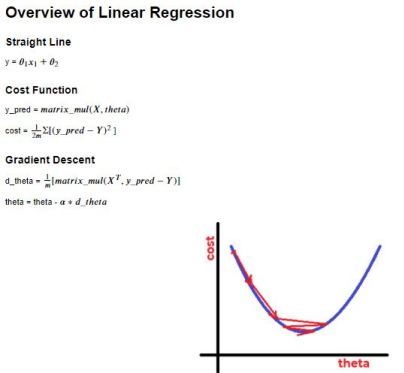

In [ ]:
# def model(X,Y,learning_rate,iterations,theta):
#   m=Y.size
#   cost_list=[]
  
#   for i in range(iterations):
#     cost=0.0
#     for j in range(m)
#       x_temp=X.iloc[j,:]
#       y_pred=np.dot(x_temp,theta)
#       cost_temp=((y_pred-Y)**2)
#       cost+=cost_temp
#       # cost=(1/(2*m))*np.sum(np.square(y_pred-Y))
#     cost/=(2*m)
#     d_theta=(1/m)*np.dot(X.T,y_pred-Y)
#     theta=theta-learning_rate*d_theta

#     cost_list.append(cost)

#     return theta,cost_list


In [ ]:
# type(x_train.values)
len(x_test)

495

In [ ]:
#Extract out the nth degree polynomial from the given input feature 
def matrix_test(n):
  x=[]
  m=len(df_test)
  for i in range(m):
    x1=df_train.iloc[i,0]
    x2=df_train.iloc[i,1]
    for j in range(n+1):
      for k in range(n+1):
        if(j+k<=n):
          exp=(x1**j)*(x2**k)
          x.append(exp)
      
  col=int((len(x))/m)
  W=np.ones((col,1))
  x=np.array(x).reshape(m,col)
  W=pd.DataFrame(data=W)
  X=pd.DataFrame(data=x)
  return X,W

In [ ]:
#Extract out the nth degree polynomial from the given input feature 
def matrix_x(n):
  x=[]
  m=len(df_train)
  for i in range(m):
    x1=df_train.iloc[i,0]
    x2=df_train.iloc[i,1]
    for j in range(n+1):
      for k in range(n+1):
        if(j+k<=n):
          exp=(x1**j)*(x2**k)
          x.append(exp)
      
  col=int((len(x))/m)
  W=np.ones((col,1))
  x=np.array(x).reshape(m,col)
  W=pd.DataFrame(data=W)
  X=pd.DataFrame(data=x)
  return X,W

In [ ]:
def model(X,Y,learning_rate,iterations,theta,degree):
  m=Y.size
  cost_list_train=[]
  cost_list_test=[]
  epochs=[]

  for i in range(iterations):
    # print(theta.shape)
    # print(X.shape)
    # print(type(theta))
    # print(type(X))
    q=len(x_test)
    y_pred=np.dot(X,theta)
    y_test_er=(y_test.values).reshape(495,1)
    x_test_er,w=matrix_test(degree)
    x_test_er=x_test_er.values
    y_pred_er=np.dot(x_test_er,theta)
    cost=(1/(2*m))*np.sum(np.square(Y-y_pred))

    t_cost=(1/(2*q))*np.sum(np.square(y_test_er-y_pred_er))

    d_theta=(1/q)*np.dot(X.T,y_pred-Y)
    
    # print(type(cost))
    # print("printing d_theta type!!! ")
    # print((X.T).shape)
    # print(Y.shape)
    # print(y_pred.shape)
    # print(d_theta.shape)
    # print(type(d_theta))
    theta=theta-(learning_rate*d_theta)
    # print(theta.shape)
    if(i%50==0):
      print(f'The training error is {cost} and the testing error is {t_cost}')
      cost_list_train.append(cost)
      cost_list_test.append(t_cost)
      epochs.append(i+1)

    

  return theta,cost_list_train,cost_list_test,epochs

In [ ]:
def ridge_model(X,Y,learning_rate,iterations,theta,lamb,degree):
  m=Y.size
  cost_list_train=[]
  cost_list_test=[]
  epochs=[]

  for i in range(iterations):
    # print(theta.shape)
    # print(X.shape)
    # print(type(theta))
    # print(type(X))
    q=len(x_test)
    y_pred=np.dot(X,theta)
    y_test_er=(y_test.values).reshape(495,1)
    x_test_er,w=matrix_test(degree)
    x_test_er=x_test_er.values
    y_pred_er=np.dot(x_test_er,theta)
    y_pred=np.dot(X,theta)
    cost=(1/(2*m))*np.sum(np.square(Y-y_pred))+(lamb*np.sum(np.square(theta)))

    t_cost=(1/(2*q))*np.sum(np.square(y_test_er-y_pred_er))+(lamb*np.sum(np.square(theta)))

    d_theta=((1/m)*np.dot(X.T,y_pred-Y))+(lamb*theta)
    # print(cost)
    # print(type(cost))
    # print("printing d_theta type!!! ")
    # print((X.T).shape)
    # print(Y.shape)
    # print(y_pred.shape)
    # print(d_theta.shape)
    # print(type(d_theta))
    theta=theta-(learning_rate*d_theta)
    # print(theta.shape)
    if(i%50==0):
      print(f'The training error is {cost} and the testing error is {t_cost}')
      cost_list_train.append(cost)
      cost_list_test.append(t_cost)
      epochs.append(i+1)
    

  return theta,cost_list_train,cost_list_test,epochs

In [ ]:
def ridge_model_stochastic(X,Y,learning_rate,iterations,theta,lamb,degree):
  m=Y.size
  cost_list_train=[]
  cost_list_test=[]
  epochs=[]
  for i in range(iterations):
    q=len(x_test)
    y_pred=np.dot(X,theta)
    y_test_er=(y_test.values).reshape(495,1)
    x_test_er,w=matrix_test(degree)
    x_test_er=x_test_er.values
    y_pred_er=np.dot(x_test_er,theta)

    for j in range(m):
      y_pred=np.dot(X[j],theta)
      # print(len(X[j]))

      # print(y_pred)
      # print(Y[j])
      l1=len(X[j])
      t1=X[j].reshape(l1,1)
      t2=y_pred-Y[j].reshape(1,1)
      d_theta=(1/m)*np.dot((t1),(t2))+(lamb*(np.sum(theta)))
      cost=(1/(2*m))*np.sum(np.square(Y-y_pred))+(lamb*(np.sum(np.square(theta))))
      # print(cost)
      # print(cost.type)
      theta=theta-(learning_rate*d_theta)
      
    t_cost=(1/(2*q))*np.sum(np.square(y_test_er-y_pred_er))  
    if(i%50==0):
      # print(f'printing i: {i}')
      # print(type(cost))
      # print(type(t_cost))
      print(f'The training error is {cost} and the testing error is {t_cost}')
      cost_list_train.append(cost)
      cost_list_test.append(t_cost)
      epochs.append(i+1)

    # y_pred=np.dot(X,theta)
    # cost=(1/(2*m))*np.sum(np.square(Y-y_pred))

    # d_theta=(1/m)*np.dot(X.T,y_pred-Y)
      # theta=theta-(learning_rate*d_theta)
      #  cost_list.append(cost)

  return theta,cost_list_train,cost_list_test,epochs

In [ ]:
def lasso_model(X,Y,learning_rate,iterations,theta,lamb,degree):
  m=Y.size
  cost_list_train=[]
  cost_list_test=[]
  epochs=[]

  for i in range(iterations):
    # print(theta.shape)
    # print(X.shape)
    # print(type(theta))
    # print(type(X))
    q=len(x_test)
    y_pred=np.dot(X,theta)
    y_test_er=(y_test.values).reshape(495,1)
    x_test_er,w=matrix_test(degree)
    x_test_er=x_test_er.values
    y_pred_er=np.dot(x_test_er,theta)
    y_pred=np.dot(X,theta)
    cost=(1/(2*m))*np.sum(np.square(Y-y_pred))+(lamb*np.sum(np.absolute(theta)))

    t_cost=(1/(2*q))*np.sum(np.square(y_test_er-y_pred_er))
    # theta_abs=theta
    # for j in range(len(theta)):
    #   for k in range(len(theta[j])):
    #     if(theta[j][k]<0):
    #       theta_abs[j][k]=-1
    #     else:
    #        theta_abs[j][k]=1
        
    d_theta=((1/m)*np.dot(X.T,y_pred-Y))+(lamb*np.sign(theta))
    # print(cost)
    # print(type(cost))
    # print("printing d_theta type!!! ")
    # print((X.T).shape)
    # print(Y.shape)
    # print(y_pred.shape)
    # print(d_theta.shape)
    # print(type(d_theta))
    theta=theta-(learning_rate*d_theta)
    # print(theta.shape)
    if(i%50==0):
      print(f'The training error is {cost} and the testing error is {t_cost}')
      cost_list_train.append(cost)
      cost_list_test.append(t_cost)
      epochs.append(i+1)

  return theta,cost_list_train,cost_list_test,epochs

In [ ]:
def lasso_stochastic_model(X,Y,learning_rate,iterations,theta,lamb,degree):
  m=Y.size
  cost_list_train=[]
  cost_list_test=[]
  epochs=[]
  for i in range(iterations):
    q=len(x_test)
    y_pred=np.dot(X,theta)
    y_test_er=(y_test.values).reshape(495,1)
    x_test_er,w=matrix_test(degree)
    x_test_er=x_test_er.values
    y_pred_er=np.dot(x_test_er,theta)

    for j in range(m):
      y_pred=np.dot(X[j],theta)
      # print(len(X[j]))

      # print(y_pred)
      # print(Y[j])
      l1=len(X[j])
      t1=X[j].reshape(l1,1)
      t2=y_pred-Y[j].reshape(1,1)
      d_theta=(1/m)*np.dot((t1),(t2))
      cost=(1/(2*m))*np.sum(np.square(Y-y_pred))+(lamb*(np.sum(np.abs(theta))))
      # print(cost)
      # print(cost.type)
      theta=theta-(learning_rate*(d_theta-(lamb*(np.sign(theta)))))
      
    t_cost=(1/(2*q))*np.sum(np.square(y_test_er-y_pred_er))  
    if(i%50==0):
      # print(f'printing i: {i}')
      # print(type(cost))
      # print(type(t_cost))
      print(f'The training error is {cost} and the testing error is {t_cost}')
      cost_list_train.append(cost)
      cost_list_test.append(t_cost)
      epochs.append(i+1)

    # y_pred=np.dot(X,theta)
    # cost=(1/(2*m))*np.sum(np.square(Y-y_pred))

    # d_theta=(1/m)*np.dot(X.T,y_pred-Y)
      # theta=theta-(learning_rate*d_theta)
      #  cost_list.append(cost)

  return theta,cost_list_train,cost_list_test,epochs

In [ ]:
def stochastic_model(X,Y,learning_rate,iterations,theta,degree):
  m=Y.size
  cost_list_train=[]
  cost_list_test=[]
  epochs=[]

  for i in range(iterations):
    q=len(x_test)
    y_pred=np.dot(X,theta)
    y_test_er=(y_test.values).reshape(495,1)
    x_test_er,w=matrix_test(degree)
    x_test_er=x_test_er.values
    y_pred_er=np.dot(x_test_er,theta)

    for j in range(m):
      y_pred=np.dot(X[j],theta)
      # print(len(X[j]))

      # print(y_pred)
      # print(Y[j])
      l1=len(X[j])
      t1=X[j].reshape(l1,1)
      t2=y_pred-Y[j].reshape(1,1)
      d_theta=(1/m)*np.dot((t1),(t2))
      cost=(1/(2*m))*np.sum(np.square(Y-y_pred))

      
      # print(cost)
      # print(cost.type)
      theta=theta-(learning_rate*d_theta)
      
    t_cost=(1/(2*q))*np.sum(np.square(y_test_er-y_pred_er))  
    if(i%50==0):
      
      print(f'The training error is {cost} and the testing error is {t_cost}')
      cost_list_train.append(cost)
      cost_list_test.append(t_cost)
      epochs.append(i+1)

    # y_pred=np.dot(X,theta)
    # cost=(1/(2*m))*np.sum(np.square(Y-y_pred))

    # d_theta=(1/m)*np.dot(X.T,y_pred-Y)
      # theta=theta-(learning_rate*d_theta)
      #  cost_list.append(cost)

  return theta,cost_list_train,cost_list_test,epochs

## **0 degree polynomial**

In [ ]:
X_0,W_0=matrix_x(0)
print(X_0.shape)
print(W_0.shape)
y_t_v=y_train.values.reshape((1155,1))
print(y_t_v.shape)

(1155, 1)
(1, 1)
(1155, 1)


The training error is 0.18538528138528138 and the testing error is 0.17854545454545453
The training error is 0.1590460332982286 and the testing error is 0.15273415632729812
The training error is 0.13819394357567985 and the testing error is 0.13235181552702924
The training error is 0.12168589276268166 and the testing error is 0.11626172873482805
The training error is 0.1086169032623232 and the testing error is 0.10356462709710249
The training error is 0.09827052812117079 and the testing error is 0.09354914307454432
The training error is 0.09007957513597491 and the testing error is 0.08565260392579199
The training error is 0.08359501316230032 and the testing error is 0.07942999974493357
The training error is 0.07846135605714707 and the testing error is 0.07452942232803837
The training error is 0.07439717479397444 and the testing error is 0.07067262615730535
The training error is 0.0711796694168929 and the testing error is 0.06763964383707027
The training error is 0.06863245506271143 and 

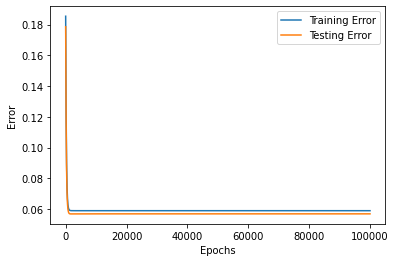

In [ ]:
# X_0,W_0=matrix_x(0)
# y_t_v=y_train.values.reshape((1155,1))
X_0,W_0=matrix_x(0)
y_t_v=y_train.values.reshape((1155,1))
# return theta,cost_list_train,cost_list_test,epochs
gradient_m0,costtrain_0,costlist_0,epochs=model(X_0.values,y_t_v,learning_rate=0.001,iterations=100000,theta=W_0.values,degree=0)
plt.plot(epochs,costtrain_0)
plt.plot(epochs,costlist_0)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
# gradient_m0,cost_0=model(X_0.values,y_t_v,learning_rate=0.010,iterations=600,theta=W_0.values,degree=0)

The training error is 0.18513275384912217 and the testing error is 0.17854545454545453
The training error is 0.17312504260236264 and the testing error is 0.16674728764659766
The training error is 0.16226002052197355 and the testing error is 0.15608270459202872
The training error is 0.15242894612200195 and the testing error is 0.14644330192991478
The training error is 0.1435334260505839 and the testing error is 0.13773101794722067
The training error is 0.13548443033392785 and the testing error is 0.1298571472653348
The training error is 0.12820140133227226 and the testing error is 0.12274144927065785
The training error is 0.12161144748998257 and the testing error is 0.11631134144763747
The training error is 0.11564861381048512 and the testing error is 0.1105011695318085
The training error is 0.11025322175475794 and the testing error is 0.10525154716977403
The training error is 0.10537127195684848 and the testing error is 0.10050875846911254
The training error is 0.10095390377852333 and 

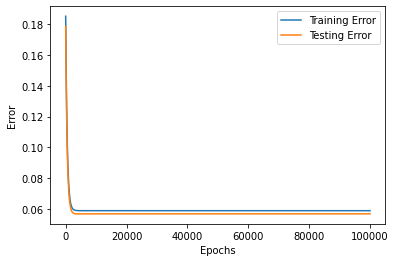

In [ ]:
X_0,W_0=matrix_x(0)
y_t_v=y_train.values.reshape((1155,1))
stochastic_m0,costtrain_0,costlist_0,epochs=stochastic_model(X_0.values,y_t_v,learning_rate=0.0010,iterations=100000,theta=W_0.values,degree=0)
plt.plot(epochs,costtrain_0)
plt.plot(epochs,costlist_0)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# stochastic_m0,scost_m0=stochastic_model(X_0.values,y_t_v,learning_rate=0.010,iterations=500,theta=W_0.values,degree=0)

In [ ]:
def fun_z(x,y,n,theta):
  z=[]
  
  # m=len(df_train)
  # print(x.shape)
  # print(x)
  # print(y.shape)
  # print(m)
  length=len(x)
  for i in range(length):
    lis=[]
    for j in range(length):
      lis.append(0)
    z.append(lis)
  
  # print(type(z))
  for i in range(length):
    for j in range(length):
      x1=x[i][j]
      x2=y[i][j]
      combi=[]
      cnt=0
      for k in range(n+1):
        for l in range(n+1):
          if (l+k<=n):
            # print(x1)
            # print(x2)
            combi.append((x1**k)*(x2**l))
            cnt+=1
      # print(len(combi))
      # print(cnt)
      # col=int((len(x))/cnt)
      combi=np.array(combi).reshape(cnt,1)
      # print(len(combi))
      # print(combi.shape)
      # print(theta.shape)
      ot=np.dot(combi.T,theta)
      num=ot[0,0]
      z[i][j]=num
      # print(num)
      # print(z[i][j])
      # print(theta)
      # print(z[i][j])
  z=np.array(z)  
  return z

In [ ]:

x1=np.linspace(-1,1,30)
x2=np.linspace(-1,1,30)
# x1=x1.reshape(1650,1)
# x2=x2.reshape(1650,1)
# print(X.shape)
X,Y=np.meshgrid(x1,x2)

# print(type(X))
# print(Y.shape)
# X
# plt.scatter(X,Y)
# plt.show()
Z=fun_z(X,Y,0,gradient_m0)
# print(Z.shape)
# Z

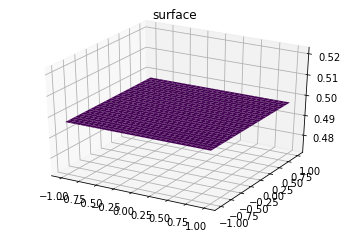

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [ ]:
# # X_0,W_0=matrix_x(0)
# # y_t_v=y_train.values.reshape((1155,1))
# ridge_m0,rcosttestm0,rcosttrainm0=ridge_model(X_0.values,y_t_v,learning_rate=0.010,iterations=500,theta=W_0.values,lamb=1e-25,degree=0)


In [ ]:
# # X_0,W_0=matrix_x(0)
# # y_t_v=y_train.values.reshape((1155,1))
# lasso_m0,lcost_m0=lasso_model(X_0.values,y_t_v,learning_rate=0.010,iterations=500,theta=W_0.values,lamb=1e-5,degree=0)

In [ ]:
y_p_0=np.dot(X_0.values,gradient_m0)

In [ ]:
X_0.values

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
y_p_0

array([[0.49714286],
       [0.49714286],
       [0.49714286],
       ...,
       [0.49714286],
       [0.49714286],
       [0.49714286]])

In [ ]:
y_t_v

array([[0.8],
       [0.2],
       [0.8],
       ...,
       [0.8],
       [0.4],
       [0.8]])

## **1 degree polynomial**

In [ ]:
X_1,W_1=matrix_x(1)
print(X_1.shape)
print(W_1.shape)
y_t_v=y_train.values.reshape((1155,1))
print(y_t_v.shape)

(1155, 3)
(3, 1)
(1155, 1)


The training error is 1.3331697085733696 and the testing error is 1.2762116795914122
The training error is 0.9608743173088989 and the testing error is 0.9106418727766781
The training error is 0.7006215657208587 and the testing error is 0.6559606303700976
The training error is 0.5186254478671664 and the testing error is 0.4785955622718243
The training error is 0.3912891898257613 and the testing error is 0.35512116684473405
The training error is 0.3021323423258666 and the testing error is 0.2691950610432561
The training error is 0.23964461297199818 and the testing error is 0.20941879202678237
The training error is 0.19578694824837364 and the testing error is 0.1678442929948549
The training error is 0.16494466514083297 and the testing error is 0.1389311851578685
The training error is 0.14319630145501214 and the testing error is 0.11881888924742386
The training error is 0.12780296913107383 and the testing error is 0.1048185477154048
The training error is 0.11685171038478279 and the testing

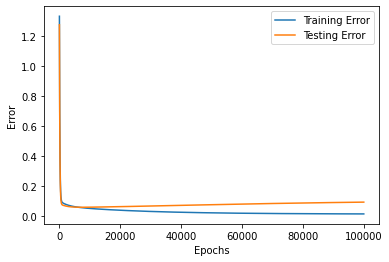

In [ ]:
X_1,W_1=matrix_x(1)
y_t_v=y_train.values.reshape((1155,1))
# return theta,cost_list_train,cost_list_test,epochs
gradient_m1,costtrain_1,costlist_1,epochs=model(X_1.values,y_t_v,learning_rate=0.001,iterations=100000,theta=W_1.values,degree=1)
plt.plot(epochs,costtrain_1)
plt.plot(epochs,costlist_1)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [ ]:
lamb_values=[1,10,100]
lamb_values

[1, 10, 100]

In [ ]:
X_1,W_1=matrix_x(1)
y_t_v=y_train.values.reshape((1155,1))
stochastic_m1,costtrain_1,costlist_1,epochs=stochastic_model(X_1.values,y_t_v,learning_rate=0.0010,iterations=100000,theta=W_1.values,degree=1)
plt.plot(epochs,costtrain_1)
plt.plot(epochs,costlist_1)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

The training error is 1.7672096720829285 and the testing error is 1.2762116795914122
The training error is 1.5366171570620868 and the testing error is 1.1035568771468913
The training error is 1.3379055592177957 and the testing error is 0.9556256861575241
The training error is 1.1666107524735323 and the testing error is 0.8288855801043363
The training error is 1.018898218306737 and the testing error is 0.7203078770641895
The training error is 0.8914738852120345 and the testing error is 0.6272959446585338
The training error is 0.7815076233713475 and the testing error is 0.5476236303195072
The training error is 0.686567595985083 and the testing error is 0.4793824609211484
The training error is 0.6045639245094273 and the testing error is 0.4209363631047962
The training error is 0.5337003444414138 and the testing error is 0.3708828334007
The training error is 0.47243271647533486 and the testing error is 0.328019639712111
The training error is 0.41943341926611 and the testing error is 0.2913

In [ ]:
def fun_z(x,y,n,theta):
  z=[]
  
  # m=len(df_train)
  # print(x.shape)
  # print(x)
  # print(y.shape)
  # print(m)
  length=len(x)
  for i in range(length):
    lis=[]
    for j in range(length):
      lis.append(0)
    z.append(lis)
  
  # print(type(z))
  for i in range(length):
    for j in range(length):
      x1=x[i][j]
      x2=y[i][j]
      combi=[]
      cnt=0
      for k in range(n+1):
        for l in range(n+1):
          if (l+k<=n):
            # print(x1)
            # print(x2)
            combi.append((x1**k)*(x2**l))
            cnt+=1
      # print(len(combi))
      # print(cnt)
      # col=int((len(x))/cnt)
      combi=np.array(combi).reshape(cnt,1)
      # print(len(combi))
      # print(combi.shape)
      # print(theta.shape)
      ot=np.dot(combi.T,theta)
      num=ot[0,0]
      z[i][j]=num
      # print(num)
      # print(z[i][j])
      # print(theta)
      # print(z[i][j])
  z=np.array(z)  
  return z

In [ ]:
x1=np.linspace(-1,1,30)
x2=np.linspace(-1,1,30)
# x1=x1.reshape(1650,1)
# x2=x2.reshape(1650,1)
# print(X.shape)
X,Y=np.meshgrid(x1,x2)

# print(type(X))
# print(Y.shape)
# X
# plt.scatter(X,Y)
# plt.show()
Z=fun_z(X,Y,1,gradient_m1)
# print(Z.shape)
# Z


In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');


In [ ]:
# training_error=[]
# testing_error=[]
# lamb_lis=[]
# for i in range(2):
#   print(lamb_values[i])
#   power=-lamb_values[i]
#   X_1,W_1=matrix_x(1)
#   y_t_v=y_train.values.reshape((1155,1))
#   tar=pow(10.0,power)
#   print(tar)
#   ridge_m1,rcosttrain_m1,rcosttest_m1,epochs=ridge_model(X_1.values,y_t_v,learning_rate=0.0010,iterations=500,theta=W_1.values,lamb=tar,degree=1)
#   lamb_lis.append(power)
#   print(rcosttrain_m1[-1])
#   print(rcosttest_m1[-1])
#   training_error.append(rcosttrain_m1[-1])
#   testing_error.append(rcosttest_m1[-1])

# # for i in range(len(training_error)):
# #   print(training_error[i])
# plt.plot(lamb_lis,training_error)
# plt.plot(lamb_lis,testing_error)
# plt.legend(['Training Error','Testing Error'])
# plt.xlabel('Value of Lambda in log')
# plt.ylabel('Error')
# plt.show()


In [ ]:
# training_error=[]
# testing_error=[]
# lamb_lis=[]
# for i in range(2):
#   print(lamb_values[i])
#   power=-lamb_values[i]
#   X_1,W_1=matrix_x(1)
#   y_t_v=y_train.values.reshape((1155,1))
#   tar=pow(10.0,power)
#   print(tar)
#   lasso_m1,lcost_m1=lasso_model(X_1.values,y_t_v,learning_rate=0.010,iterations=1000,theta=W_1.values,lamb=1e-5,degree=1)
#   lamb_lis.append(power)
#   print(rcosttrain_m1[-1])
#   print(rcosttest_m1[-1])
#   training_error.append(rcosttrain_m1[-1])
#   testing_error.append(rcosttest_m1[-1])
# plt.plot(lamb_lis,training_error)
# plt.plot(lamb_lis,testing_error)
# plt.legend(['Training Error','Testing Error'])
# plt.xlabel('Value of Lambda in log')
# plt.ylabel('Error')
# plt.show()

In [ ]:
y_p_1=np.dot(X_1.values,gradient_m1)

In [ ]:
X_1.values

In [ ]:
y_p_1

In [ ]:
y_t_v

In [ ]:
# temp21,temp22=ridge_model(X_1.values,y_t_v,learning_rate=0.01,iterations=70000,theta=W_1.values,lamb=1e-25)

In [ ]:
# temp25,temp26=lasso_model(X_1.values,y_t_v,learning_rate=0.01,iterations=70000,theta=W_1.values,lamb=1e-25)

## **2 degree polynomial**

In [ ]:
X_2,W_2=matrix_x(2)
print(X_2.shape)
print(W_2.shape)
y_t_v=y_train.values.reshape((1155,1))
print(y_t_v.shape)

In [ ]:
X_2,W_2=matrix_x(2)
y_t_v=y_train.values.reshape((1155,1))
# return theta,cost_list_train,cost_list_test,epochs
gradient_m2,costtrain_2,costlist_2,epochs=model(X_2.values,y_t_v,learning_rate=0.001,iterations=100000,theta=W_2.values,degree=2)
plt.plot(epochs,costtrain_2)
plt.plot(epochs,costlist_2)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
# gradient_m2,cost_2=model(X_2.values,y_t_v,learning_rate=0.0010,iterations=100000,theta=W_2.values,degree=2)

In [ ]:
X_2,W_2=matrix_x(2)
y_t_v=y_train.values.reshape((1155,1))
stochastic_m2,costtrain_2,costlist_2,epochs=stochastic_model(X_2.values,y_t_v,learning_rate=0.0010,iterations=100000,theta=W_2.values,degree=2)
plt.plot(epochs,costtrain_2)
plt.plot(epochs,costlist_2)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


In [ ]:
def fun_z(x,y,n,theta):
  z=[]
  
  # m=len(df_train)
  # print(x.shape)
  # print(x)
  # print(y.shape)
  # print(m)
  length=len(x)
  for i in range(length):
    lis=[]
    for j in range(length):
      lis.append(0)
    z.append(lis)
  
  # print(type(z))
  for i in range(length):
    for j in range(length):
      x1=x[i][j]
      x2=y[i][j]
      combi=[]
      cnt=0
      for k in range(n+1):
        for l in range(n+1):
          if (l+k<=n):
            # print(x1)
            # print(x2)
            combi.append((x1**k)*(x2**l))
            cnt+=1
      # print(len(combi))
      # print(cnt)
      # col=int((len(x))/cnt)
      combi=np.array(combi).reshape(cnt,1)
      # print(len(combi))
      # print(combi.shape)
      # print(theta.shape)
      ot=np.dot(combi.T,theta)
      num=ot[0,0]
      z[i][j]=num
      # print(num)
      # print(z[i][j])
      # print(theta)
      # print(z[i][j])
  z=np.array(z)  
  return z


In [ ]:
x1=np.linspace(-1,1,30)
x2=np.linspace(-1,1,30)
# x1=x1.reshape(1650,1)
# x2=x2.reshape(1650,1)
# print(X.shape)
X,Y=np.meshgrid(x1,x2)

# print(type(X))
# print(Y.shape)
# X
# plt.scatter(X,Y)
# plt.show()
Z=fun_z(X,Y,2,gradient_m2)
# print(Z.shape)
# Z

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');


In [ ]:
# training_error=[]
# testing_error=[]
# lamb_lis=[]
# for i in range(2):
#   print(lamb_values[i])
#   power=-lamb_values[i]
#   X_1,W_1=matrix_x(1)
#   y_t_v=y_train.values.reshape((1155,1))
#   tar=pow(10.0,power)
#   print(tar)
#   ridge_m2,rcosttrain_m2,rcosttest_m2,epochs=ridge_model(X_2.values,y_t_v,learning_rate=0.0010,iterations=500,theta=W_2.values,lamb=tar,degree=2)
#   lamb_lis.append(power)
#   print(rcosttrain_m2[-1])
#   print(rcosttest_m2[-1])
#   training_error.append(rcosttrain_m2[-1])
#   testing_error.append(rcosttest_m2[-1])

# # for i in range(len(training_error)):
# #   print(training_error[i])
# plt.plot(lamb_lis,training_error)
# plt.plot(lamb_lis,testing_error)
# plt.legend(['Training Error','Testing Error'])
# plt.xlabel('Value of Lambda in log')
# plt.ylabel('Error')
# plt.show()



In [ ]:
# training_error=[]
# testing_error=[]
# lamb_lis=[]
# for i in range(2):
#   print(lamb_values[i])
#   power=-lamb_values[i]
#   X_2,W_2=matrix_x(2)
#   y_t_v=y_train.values.reshape((1155,1))
#   tar=pow(10.0,power)
#   print(tar)
#   lasso_m2,lcost_m2=lasso_model(X_2.values,y_t_v,learning_rate=0.010,iterations=1000,theta=W_2.values,lamb=1e-5,degree=2)
#   lamb_lis.append(power)
#   print(rcosttrain_m2[-1])
#   print(rcosttest_m2[-1])
#   training_error.append(rcosttrain_m2[-1])
#   testing_error.append(rcosttest_m2[-1])
# plt.plot(lamb_lis,training_error)
# plt.plot(lamb_lis,testing_error)
# plt.legend(['Training Error','Testing Error'])
# plt.xlabel('Value of Lambda in log')
# plt.ylabel('Error')
# plt.show()
# # lasso_m2,lcost_m2=lasso_model(X_2.values,y_t_v,learning_rate=0.010,iterations=100,theta=W_2.values,lamb=1e-2,degree=2)

In [ ]:
y_p_2=np.dot(X_2.values,gradient_m2)

In [ ]:
X_2.values

In [ ]:
y_p_2

In [ ]:
y_t_v

## **3 degree polynomial**

In [ ]:
# X=[0.8660,0.8601,0.8680]
# Y=[2,3,4]
# plt.plot(X)
X_3,W_3=matrix_x(3)
print(X_3.shape)
print(W_3.shape)
y_t_v=y_train.values.reshape((1155,1))
print(y_t_v.shape)

In [ ]:
X_3,W_3=matrix_x(3)
y_t_v=y_train.values.reshape((1155,1))
# return theta,cost_list_train,cost_list_test,epochs
gradient_m3,costtrain_3,costlist_3,epochs=model(X_3.values,y_t_v,learning_rate=0.001,iterations=100000,theta=W_3.values,degree=3)
plt.plot(epochs,costtrain_3)
plt.plot(epochs,costlist_3)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
# gradient_m3,cost_3=model(X_3.values,y_t_v,learning_rate=0.10,iterations=80000,theta=W_3.values,degree=3)

In [ ]:
def fun_z(x,y,n,theta):
  z=[]
  
  # m=len(df_train)
  # print(x.shape)
  # print(x)
  # print(y.shape)
  # print(m)
  length=len(x)
  for i in range(length):
    lis=[]
    for j in range(length):
      lis.append(0)
    z.append(lis)
  
  # print(type(z))
  for i in range(length):
    for j in range(length):
      x1=x[i][j]
      x2=y[i][j]
      combi=[]
      cnt=0
      for k in range(n+1):
        for l in range(n+1):
          if (l+k<=n):
            # print(x1)
            # print(x2)
            combi.append((x1**k)*(x2**l))
            cnt+=1
      # print(len(combi))
      # print(cnt)
      # col=int((len(x))/cnt)
      combi=np.array(combi).reshape(cnt,1)
      # print(len(combi))
      # print(combi.shape)
      # print(theta.shape)
      ot=np.dot(combi.T,theta)
      num=ot[0,0]
      z[i][j]=num
      # print(num)
      # print(z[i][j])
      # print(theta)
      # print(z[i][j])
  z=np.array(z)  
  return z


In [ ]:
x1=np.linspace(-1,1,30)
x2=np.linspace(-1,1,30)
# x1=x1.reshape(1650,1)
# x2=x2.reshape(1650,1)
# print(X.shape)
X,Y=np.meshgrid(x1,x2)

# print(type(X))
# print(Y.shape)
# X
# plt.scatter(X,Y)
# plt.show()
Z=fun_z(X,Y,3,gradient_m3)
# print(Z.shape)
# Z

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');


In [ ]:
x_values = np.linspace(-5, 5, 100)
print(x_values.shape)

In [ ]:
X_3,W_3=matrix_x(3)
y_t_v=y_train.values.reshape((1155,1))
stochastic_m3,costtrain_3,costlist_3,epochs=stochastic_model(X_3.values,y_t_v,learning_rate=0.0010,iterations=100000,theta=W_3.values,degree=3)
plt.plot(epochs,costtrain_3)
plt.plot(epochs,costlist_3)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# stochastic_m3,scost_m3=stochastic_model(X_3.values,y_t_v,learning_rate=0.050,iterations=300,theta=W_3.values,degree=3)

In [ ]:
# training_error=[]
# testing_error=[]
# lamb_lis=[]
# for i in range(2):
#   print(lamb_values[i])
#   power=-lamb_values[i]
#   X_3,W_3=matrix_x(3)
#   y_t_v=y_train.values.reshape((1155,1))
#   tar=pow(10.0,power)
#   print(tar)
#   ridge_m3,rcosttrain_m3,rcosttest_m3,epochs=ridge_model(X_3.values,y_t_v,learning_rate=0.0010,iterations=500,theta=W_3.values,lamb=tar,degree=3)
#   lamb_lis.append(power)
#   print(rcosttrain_m3[-1])
#   print(rcosttest_m3[-1])
#   training_error.append(rcosttrain_m3[-1])
#   testing_error.append(rcosttest_m3[-1])

# # for i in range(len(training_error)):
# #   print(training_error[i])
# plt.plot(lamb_lis,training_error)
# plt.plot(lamb_lis,testing_error)
# plt.legend(['Training Error','Testing Error'])
# plt.xlabel('Value of Lambda in log')
# plt.ylabel('Error')
# plt.show()


# # ridge_m3,rcost_m3=ridge_model(X_3.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_3.values,lamb=1e-25,degree=3)

In [ ]:
# training_error=[]
# testing_error=[]
# lamb_lis=[]
# for i in range(2):
#   print(lamb_values[i])
#   power=-lamb_values[i]
#   X_3,W_3=matrix_x(3)
#   y_t_v=y_train.values.reshape((1155,1))
#   tar=pow(10.0,power)
#   print(tar)
#   lasso_m3,lcost_m3=lasso_model(X_3.values,y_t_v,learning_rate=0.010,iterations=1000,theta=W_3.values,lamb=1e-5,degree=3)
#   lamb_lis.append(power)
#   print(rcosttrain_m3[-1])
#   print(rcosttest_m3[-1])
#   training_error.append(rcosttrain_m3[-1])
#   testing_error.append(rcosttest_m3[-1])
# plt.plot(lamb_lis,training_error)
# plt.plot(lamb_lis,testing_error)
# plt.legend(['Training Error','Testing Error'])
# plt.xlabel('Value of Lambda in log')
# plt.ylabel('Error')
# plt.show()
# # lasso_m3,lcost_m3=lasso_model(X_2.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_2.values,lamb=1e-5)

In [ ]:
y_p_3=np.dot(X_3.values,gradient_m3)

In [ ]:
X_3.values

In [ ]:
y_p_3

In [ ]:
y_t_v

## **4 degree polynomial**

In [ ]:
X_4,W_4=matrix_x(4)
print(X_4.shape)
print(W_4.shape)
y_t_v=y_train.values.reshape((1155,1))
print(y_t_v.shape)

In [ ]:
X_4,W_4=matrix_x(4)
y_t_v=y_train.values.reshape((1155,1))
# return theta,cost_list_train,cost_list_test,epochs
gradient_m4,costtrain_4,costlist_4,epochs=model(X_4.values,y_t_v,learning_rate=0.001,iterations=100000,theta=W_4.values,degree=4)
plt.plot(epochs,costtrain_4)
plt.plot(epochs,costlist_4)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
# gradient_m4,cost_4=model(X_4.values,y_t_v,learning_rate=0.10,iterations=80000,theta=W_4.values,degree=4)

In [ ]:
X_4,W_4=matrix_x(4)
y_t_v=y_train.values.reshape((1155,1))
stochastic_m4,costtrain_4,costlist_4,epochs=stochastic_model(X_4.values,y_t_v,learning_rate=0.0010,iterations=100000,theta=W_4.values,degree=4)
plt.plot(epochs,costtrain_4)
plt.plot(epochs,costlist_4)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# stochastic_m4,scost_m4=stochastic_model(X_4.values,y_t_v,learning_rate=0.050,iterations=300,theta=W_4.values,degree=4)

In [ ]:
def fun_z(x,y,n,theta):
  z=[]
  
  # m=len(df_train)
  # print(x.shape)
  # print(x)
  # print(y.shape)
  # print(m)
  length=len(x)
  for i in range(length):
    lis=[]
    for j in range(length):
      lis.append(0)
    z.append(lis)
  
  # print(type(z))
  for i in range(length):
    for j in range(length):
      x1=x[i][j]
      x2=y[i][j]
      combi=[]
      cnt=0
      for k in range(n+1):
        for l in range(n+1):
          if (l+k<=n):
            # print(x1)
            # print(x2)
            combi.append((x1**k)*(x2**l))
            cnt+=1
      # print(len(combi))
      # print(cnt)
      # col=int((len(x))/cnt)
      combi=np.array(combi).reshape(cnt,1)
      # print(len(combi))
      # print(combi.shape)
      # print(theta.shape)
      ot=np.dot(combi.T,theta)
      num=ot[0,0]
      z[i][j]=num
      # print(num)
      # print(z[i][j])
      # print(theta)
      # print(z[i][j])
  z=np.array(z)  
  return z


In [ ]:
x1=np.linspace(-1,1,30)
x2=np.linspace(-1,1,30)
# x1=x1.reshape(1650,1)
# x2=x2.reshape(1650,1)
# print(X.shape)
X,Y=np.meshgrid(x1,x2)

# print(type(X))
# print(Y.shape)
# X
# plt.scatter(X,Y)
# plt.show()
Z=fun_z(X,Y,4,gradient_m4)
# print(Z.shape)
# Z


In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [ ]:
# ridge_m4,rcost_m4=ridge_model(X_4.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_4.values,lamb=1e-25,degree=4)

In [ ]:
# lasso_m4,lcost_m4=lasso_model(X_4.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_4.values,lamb=1e-5)

In [ ]:
y_p_4=np.dot(X_4.values,gradient_m4)

In [ ]:
X_4.values

In [ ]:
y_p_4

In [ ]:
y_t_v

## **5 degree polynomial**

In [ ]:
X_5,W_5=matrix_x(5)
print(X_5.shape)
print(W_5.shape)
y_t_v=y_train.values.reshape((1155,1))
print(y_t_v.shape)

In [ ]:
X_5,W_5=matrix_x(5)
y_t_v=y_train.values.reshape((1155,1))
# return theta,cost_list_train,cost_list_test,epochs
gradient_m5,costtrain_5,costlist_5,epochs=model(X_5.values,y_t_v,learning_rate=0.001,iterations=100000,theta=W_5.values,degree=5)
plt.plot(epochs,costtrain_5)
plt.plot(epochs,costlist_5)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
# gradient_m5,cost_5=model(X_5.values,y_t_v,learning_rate=0.10,iterations=80000,theta=W_5.values,degree=5)

In [ ]:
X_5,W_5=matrix_x(5)
y_t_v=y_train.values.reshape((1155,1))
stochastic_m5,costtrain_5,costlist_5,epochs=stochastic_model(X_5.values,y_t_v,learning_rate=0.0010,iterations=100000,theta=W_5.values,degree=5)
plt.plot(epochs,costtrain_5)
plt.plot(epochs,costlist_5)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
# stochastic_m5,scost_m5=stochastic_model(X_5.values,y_t_v,learning_rate=0.050,iterations=300,theta=W_5.values,degree=5)

In [ ]:
def fun_z(x,y,n,theta):
  z=[]
  
  # m=len(df_train)
  # print(x.shape)
  # print(x)
  # print(y.shape)
  # print(m)
  length=len(x)
  for i in range(length):
    lis=[]
    for j in range(length):
      lis.append(0)
    z.append(lis)
  
  # print(type(z))
  for i in range(length):
    for j in range(length):
      x1=x[i][j]
      x2=y[i][j]
      combi=[]
      cnt=0
      for k in range(n+1):
        for l in range(n+1):
          if (l+k<=n):
            # print(x1)
            # print(x2)
            combi.append((x1**k)*(x2**l))
            cnt+=1
      # print(len(combi))
      # print(cnt)
      # col=int((len(x))/cnt)
      combi=np.array(combi).reshape(cnt,1)
      # print(len(combi))
      # print(combi.shape)
      # print(theta.shape)
      ot=np.dot(combi.T,theta)
      num=ot[0,0]
      z[i][j]=num
      # print(num)
      # print(z[i][j])
      # print(theta)
      # print(z[i][j])
  z=np.array(z)  
  return z

In [ ]:
x1=np.linspace(-1,1,30)
x2=np.linspace(-1,1,30)
# x1=x1.reshape(1650,1)
# x2=x2.reshape(1650,1)
# print(X.shape)
X,Y=np.meshgrid(x1,x2)
# print(type(X))
# print(Y.shape)
# X
# plt.scatter(X,Y)
# plt.show()
Z=fun_z(X,Y,5,gradient_m5)
# print(Z.shape)
# Z

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');


In [ ]:
# ridge_m5,rcost_m5=ridge_model(X_5.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_5.values,lamb=1e-25,degree=5)

In [ ]:
# lasso_m5,lcost_m5=lasso_model(X_5.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_5.values,lamb=1e-5)

In [ ]:
y_p_5=np.dot(X_5.values,gradient_m5)

In [ ]:
X_5.values

In [ ]:
y_p_5

In [ ]:
y_t_v

## **6 degree polynomial**

In [ ]:
X_6,W_6=matrix_x(6)
print(X_6.shape)
print(W_6.shape)
y_t_v=y_train.values.reshape((1155,1))
print(y_t_v.shape)

In [ ]:
X_6,W_6=matrix_x(6)
y_t_v=y_train.values.reshape((1155,1))
# return theta,cost_list_train,cost_list_test,epochs
gradient_m6,costtrain_6,costlist_6,epochs=model(X_6.values,y_t_v,learning_rate=0.001,iterations=100000,theta=W_6.values,degree=6)
plt.plot(epochs,costtrain_6)
plt.plot(epochs,costlist_6)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
# gradient_m6,cost_6=model(X_6.values,y_t_v,learning_rate=0.10,iterations=80000,theta=W_6.values,degree=6)

In [ ]:
X_6,W_6=matrix_x(6)
y_t_v=y_train.values.reshape((1155,1))
stochastic_m6,costtrain_6,costlist_6,epochs=stochastic_model(X_6.values,y_t_v,learning_rate=0.001,iterations=100000,theta=W_6.values,degree=6)
plt.plot(epochs,costtrain_6)
plt.plot(epochs,costlist_6)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
# stochastic_m6,scost_m6=stochastic_model(X_6.values,y_t_v,learning_rate=0.050,iterations=300,theta=W_6.values,degree=6)

In [ ]:
def fun_z(x,y,n,theta):
  z=[]
  
  # m=len(df_train)
  # print(x.shape)
  # print(x)
  # print(y.shape)
  # print(m)
  length=len(x)
  for i in range(length):
    lis=[]
    for j in range(length):
      lis.append(0)
    z.append(lis)
  
  # print(type(z))
  for i in range(length):
    for j in range(length):
      x1=x[i][j]
      x2=y[i][j]
      combi=[]
      cnt=0
      for k in range(n+1):
        for l in range(n+1):
          if (l+k<=n):
            # print(x1)
            # print(x2)
            combi.append((x1**k)*(x2**l))
            cnt+=1
      # print(len(combi))
      # print(cnt)
      # col=int((len(x))/cnt)
      combi=np.array(combi).reshape(cnt,1)
      # print(len(combi))
      # print(combi.shape)
      # print(theta.shape)
      ot=np.dot(combi.T,theta)
      num=ot[0,0]
      z[i][j]=num
      # print(num)
      # print(z[i][j])
      # print(theta)
      # print(z[i][j])
  z=np.array(z)  
  return z


In [ ]:
x1=np.linspace(-1,1,30)
x2=np.linspace(-1,1,30)
# x1=x1.reshape(1650,1)
# x2=x2.reshape(1650,1)
# print(X.shape)
X,Y=np.meshgrid(x1,x2)

# print(type(X))
# print(Y.shape)
# X
# plt.scatter(X,Y)
# plt.show()
Z=fun_z(X,Y,6,gradient_m6)
# print(Z.shape)
# Z

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [ ]:
# ridge_m6,rcost_m6=ridge_model(X_6.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_6.values,lamb=1e-25,degree=6)

In [ ]:
# lasso_m6,lcost_m6=lasso_model(X_6.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_6.values,lamb=1e-5)

In [ ]:
y_p_6=np.dot(X_6.values,gradient_m6)

In [ ]:
X_6.values

In [ ]:
y_p_6

In [ ]:
y_t_v

## **7 degree polynomial**

In [ ]:
X_7,W_7=matrix_x(7)
print(X_7.shape)
print(W_7.shape)
y_t_v=y_train.values.reshape((1155,1))
print(y_t_v.shape)

In [ ]:
X_7,W_7=matrix_x(7)
y_t_v=y_train.values.reshape((1155,1))
# return theta,cost_list_train,cost_list_test,epochs
gradient_m7,costtrain_7,costlist_7,epochs=model(X_7.values,y_t_v,learning_rate=0.001,iterations=100000,theta=W_7.values,degree=7)
plt.plot(epochs,costtrain_7)
plt.plot(epochs,costlist_7)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
# gradient_m7,cost_7=model(X_7.values,y_t_v,learning_rate=0.10,iterations=80000,theta=W_7.values,degree=7)

In [ ]:
X_7,W_7=matrix_x(7)
y_t_v=y_train.values.reshape((1155,1))
stochastic_m7,costtrain_7,costlist_7,epochs=stochastic_model(X_7.values,y_t_v,learning_rate=0.0010,iterations=100000,theta=W_7.values,degree=7)
plt.plot(epochs,costtrain_7)
plt.plot(epochs,costlist_7)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# stochastic_m7,scost_m7=stochastic_model(X_7.values,y_t_v,learning_rate=0.050,iterations=300,theta=W_7.values,degree=7)

In [ ]:

def fun_z(x,y,n,theta):
  z=[]
  
  # m=len(df_train)
  # print(x.shape)
  # print(x)
  # print(y.shape)
  # print(m)
  length=len(x)
  for i in range(length):
    lis=[]
    for j in range(length):
      lis.append(0)
    z.append(lis)
  
  # print(type(z))
  for i in range(length):
    for j in range(length):
      x1=x[i][j]
      x2=y[i][j]
      combi=[]
      cnt=0
      for k in range(n+1):
        for l in range(n+1):
          if (l+k<=n):
            # print(x1)
            # print(x2)
            combi.append((x1**k)*(x2**l))
            cnt+=1
      # print(len(combi))
      # print(cnt)
      # col=int((len(x))/cnt)
      combi=np.array(combi).reshape(cnt,1)
      # print(len(combi))
      # print(combi.shape)
      # print(theta.shape)
      ot=np.dot(combi.T,theta)
      num=ot[0,0]
      z[i][j]=num
      # print(num)
      # print(z[i][j])
      # print(theta)
      # print(z[i][j])
  z=np.array(z)  
  return z

In [ ]:
x1=np.linspace(-1,1,30)
x2=np.linspace(-1,1,30)
# x1=x1.reshape(1650,1)
# x2=x2.reshape(1650,1)
# print(X.shape)
X,Y=np.meshgrid(x1,x2)

# print(type(X))
# print(Y.shape)
# X
# plt.scatter(X,Y)
# plt.show()
Z=fun_z(X,Y,7,gradient_m7)
# print(Z.shape)
# Z

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [ ]:
# ridge_m7,rcost_m7=ridge_model(X_7.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_7.values,lamb=1e-25,degree=7)

In [ ]:
# lasso_m7,lcost_m7=lasso_model(X_7.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_7.values,lamb=1e-5)

In [ ]:
y_p_7=np.dot(X_7.values,gradient_m7)

In [ ]:
X_7.values

In [ ]:
y_p_7

In [ ]:
y_t_v

## **8 degree polynomial**

In [ ]:
X_8,W_8=matrix_x(8)
print(X_8.shape)
print(W_8.shape)
y_t_v=y_train.values.reshape((1155,1))
print(y_t_v.shape)

In [ ]:
X_8,W_8=matrix_x(8)
y_t_v=y_train.values.reshape((1155,1))
# return theta,cost_list_train,cost_list_test,epochs
gradient_m8,costtrain_8,costlist_8,epochs=model(X_8.values,y_t_v,learning_rate=0.001,iterations=100000,theta=W_8.values,degree=8)
plt.plot(epochs,costtrain_8)
plt.plot(epochs,costlist_8)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
# gradient_m8,cost_8=model(X_8.values,y_t_v,learning_rate=0.10,iterations=80000,theta=W_8.values,degree=8)

In [ ]:
X_8,W_8=matrix_x(8)
y_t_v=y_train.values.reshape((1155,1))
stochastic_m8,costtrain_8,costlist_8,epochs=stochastic_model(X_8.values,y_t_v,learning_rate=0.0010,iterations=100000,theta=W_8.values,degree=8)
plt.plot(epochs,costtrain_8)
plt.plot(epochs,costlist_8)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# stochastic_m8,scost_m8=stochastic_model(X_8.values,y_t_v,learning_rate=0.050,iterations=300,theta=W_8.values,degree=8)

In [ ]:

def fun_z(x,y,n,theta):
  z=[]
  
  # m=len(df_train)
  # print(x.shape)
  # print(x)
  # print(y.shape)
  # print(m)
  length=len(x)
  for i in range(length):
    lis=[]
    for j in range(length):
      lis.append(0)
    z.append(lis)
  
  # print(type(z))
  for i in range(length):
    for j in range(length):
      x1=x[i][j]
      x2=y[i][j]
      combi=[]
      cnt=0
      for k in range(n+1):
        for l in range(n+1):
          if (l+k<=n):
            # print(x1)
            # print(x2)
            combi.append((x1**k)*(x2**l))
            cnt+=1
      # print(len(combi))
      # print(cnt)
      # col=int((len(x))/cnt)
      combi=np.array(combi).reshape(cnt,1)
      # print(len(combi))
      # print(combi.shape)
      # print(theta.shape)
      ot=np.dot(combi.T,theta)
      num=ot[0,0]
      z[i][j]=num
      # print(num)
      # print(z[i][j])
      # print(theta)
      # print(z[i][j])
  z=np.array(z)  
  return z

In [ ]:
x1=np.linspace(-1,1,30)
x2=np.linspace(-1,1,30)
# x1=x1.reshape(1650,1)
# x2=x2.reshape(1650,1)
# print(X.shape)
X,Y=np.meshgrid(x1,x2)

# print(type(X))
# print(Y.shape)
# X
# plt.scatter(X,Y)
# plt.show()
Z=fun_z(X,Y,8,gradient_m8)
# print(Z.shape)
# Z

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [ ]:
# ridge_m8,rcost_m8=ridge_model(X_8.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_8.values,lamb=1e-25,degree=8)

In [ ]:
# lasso_m8,lcost_m8=lasso_model(X_8.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_8.values,lamb=1e-5)

In [ ]:
y_p_8=np.dot(X_8.values,gradient_m8)

In [ ]:
X_8.values

In [ ]:
y_p_8

In [ ]:
y_t_v

## **9 degree polynomial**

In [ ]:
X_9,W_9=matrix_x(9)
print(X_9.shape)
print(W_9.shape)
y_t_v=y_train.values.reshape((1155,1))
print(y_t_v.shape)

In [ ]:
X_9,W_9=matrix_x(9)
y_t_v=y_train.values.reshape((1155,1))
# return theta,cost_list_train,cost_list_test,epochs
gradient_m9,costtrain_9,costlist_9,epochs=model(X_9.values,y_t_v,learning_rate=0.001,iterations=100000,theta=W_9.values,degree=9)
plt.plot(epochs,costtrain_9)
plt.plot(epochs,costlist_9)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
# gradient_m9,cost_9=model(X_9.values,y_t_v,learning_rate=0.10,iterations=80000,theta=W_9.values,degree=9)

In [ ]:
X_9,W_9=matrix_x(9)
y_t_v=y_train.values.reshape((1155,1))
stochastic_m9,costtrain_9,costlist_9,epochs=stochastic_model(X_9.values,y_t_v,learning_rate=0.0010,iterations=100000,theta=W_9.values,degree=9)
plt.plot(epochs,costtrain_9)
plt.plot(epochs,costlist_9)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
# stochastic_m9,scost_m9=stochastic_model(X_9.values,y_t_v,learning_rate=0.050,iterations=300,theta=W_9.values,degree=9)

In [ ]:
def fun_z(x,y,n,theta):
  z=[]
  
  # m=len(df_train)
  # print(x.shape)
  # print(x)
  # print(y.shape)
  # print(m)
  length=len(x)
  for i in range(length):
    lis=[]
    for j in range(length):
      lis.append(0)
    z.append(lis)
  
  # print(type(z))
  for i in range(length):
    for j in range(length):
      x1=x[i][j]
      x2=y[i][j]
      combi=[]
      cnt=0
      for k in range(n+1):
        for l in range(n+1):
          if (l+k<=n):
            # print(x1)
            # print(x2)
            combi.append((x1**k)*(x2**l))
            cnt+=1
      # print(len(combi))
      # print(cnt)
      # col=int((len(x))/cnt)
      combi=np.array(combi).reshape(cnt,1)
      # print(len(combi))
      # print(combi.shape)
      # print(theta.shape)
      ot=np.dot(combi.T,theta)
      num=ot[0,0]
      z[i][j]=num
      # print(num)
      # print(z[i][j])
      # print(theta)
      # print(z[i][j])
  z=np.array(z)  
  return z

In [ ]:
x1=np.linspace(-1,1,30)
x2=np.linspace(-1,1,30)
# x1=x1.reshape(1650,1)
# x2=x2.reshape(1650,1)
# print(X.shape)
X,Y=np.meshgrid(x1,x2)

# print(type(X))
# print(Y.shape)
# X
# plt.scatter(X,Y)
# plt.show()
Z=fun_z(X,Y,9,gradient_m9)
# print(Z.shape)
# Z


In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [ ]:
training_error=[]
testing_error=[]
lamb_lis=[1,5,10,15,20,40]
x=[]
print(lamb_lis)
for i in range(6):
  # print(lamb_lis[i])
  power=-lamb_lis[i]
  X_9,W_9=matrix_x(9)
  y_t_v=y_train.values.reshape((1155,1))
  tar=pow(2.7182818,power)
  print(tar)
  ridge_m9,rcosttrain_m9,rcosttest_m9,epochs=ridge_model(X_9.values,y_t_v,learning_rate=0.010,iterations=1000,theta=W_9.values,lamb=tar,degree=9)
  x.append(-power)
  print(rcosttrain_m9[-1])
  print(rcosttest_m9[-1])
  training_error.append(rcosttrain_m9[-1])
  testing_error.append(rcosttest_m9[-1])

# for i in range(len(training_error)):
#   print(training_error[i])
print(len(training_error))
plt.plot(x,training_error)
plt.plot(x,testing_error)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Value of Lambda in log')
plt.ylabel('Error')
plt.show()

# ridge_m9,rcost_m9=ridge_model(X_9.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_9.values,lamb=1e-25,degree=9)

In [ ]:
training_error=[]
testing_error=[]
lamb_lis=[1,5,10,15,20,40]
x=[]
for i in range(6):
  print(lamb_lis[i])
  power=-lamb_lis[i]
  X_9,W_9=matrix_x(9)
  y_t_v=y_train.values.reshape((1155,1))
  tar=pow(10.0,power)
  # print(tar)
  ridges_m9,rscosttrain_m9,rscosttest_m9,sepochs=ridge_model_stochastic(X_9.values,y_t_v,learning_rate=0.010,iterations=1000,theta=W_9.values,lamb=tar,degree=9)
  # lamb_lis.append(power)
  print(type(rcosttrain_m9[-1]))
  print(rcosttrain_m9[-1])
  print(rcosttest_m9[-1])
  training_error.append(rcosttrain_m9[-1])
  testing_error.append(rcosttest_m9[-1])

# for i in range(len(training_error)):
#   print(training_error[i])
plt.plot(lamb_lis,training_error)
plt.plot(lamb_lis,testing_error)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Value of Lambda in log')
plt.ylabel('Error')
plt.show()

# ridge_m9,rcost_m9=ridge_model(X_9.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_9.values,lamb=1e-25,degree=9)

In [ ]:
training_error=[]
testing_error=[]
lamb_lis=[5,10,15,20,25,40]
for i in range(6):
  print(lamb_lis[i])
  power=-lamb_lis[i]
  X_9,W_9=matrix_x(9)
  y_t_v=y_train.values.reshape((1155,1))
  tar=pow(2.718281828459045,power)
  print(tar)
  lasso_m9,lcosttrain_m9,lcosttest_m9,lepochs=lasso_model(X_9.values,y_t_v,learning_rate=0.0010,iterations=1000,theta=W_9.values,lamb=tar,degree=9)
  # lamb_lis.append(power)
  print(lcosttrain_m9[-1])
  print(lcosttest_m9[-1])
  training_error.append(lcosttrain_m9[-1])
  testing_error.append(lcosttest_m9[-1])
plt.plot(lamb_lis,training_error)
plt.plot(lamb_lis,testing_error)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Value of Lambda in log')
plt.ylabel('Error')
plt.show()
# lasso_m9,lcost_m9=lasso_model(X_9.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_9.values,lamb=1e-5)

In [ ]:
training_error=[]
testing_error=[]
lamb_lis=[5,10,15,20,25,40]
for i in range(6):
  print(lamb_lis[i])
  power=-lamb_lis[i]
  X_9,W_9=matrix_x(9)
  y_t_v=y_train.values.reshape((1155,1))
  tar=pow(2.718281828459045,power)
  print(tar)
  lasso_m9,lscosttrain_m9,lscosttest_m9,lsepochs=lasso_stochastic_model(X_9.values,y_t_v,learning_rate=0.0050,iterations=1000,theta=W_9.values,lamb=tar,degree=9)
  # lamb_lis.append(power)
  print(lscosttrain_m9[-1])
  print(lscosttest_m9[-1])
  training_error.append(lscosttrain_m9[-1])
  testing_error.append(lscosttest_m9[-1])
plt.plot(lamb_lis,training_error)
plt.plot(lamb_lis,testing_error)
plt.legend(['Training Error','Testing Error'])
plt.xlabel('Value of Lambda in log')
plt.ylabel('Error')
plt.show()
# lasso_m9,lcost_m9=lasso_model(X_9.values,y_t_v,learning_rate=0.010,iterations=50,theta=W_9.values,lamb=1e-5)

In [ ]:
print(gradient_m9.shape)

In [ ]:
y_p_9=np.dot(X_9.values,gradient_m9)

In [ ]:
X_9.values.shape

In [ ]:
X_9.values

In [ ]:
y_p_9

In [ ]:
y_t_v

In [ ]:
#Gradient
import matplotlib.pyplot as plt
X_train=[0.05895262832405689,0.050291565622157426,0.043489114210130506,0.04023042852028591,0.03817306665221076,0.036200904296097514,0.03394482614862911,0.0315172778914993,0.029240652330973987,0.027435400001584273]
X_test=[0.05690191713048854,0.0576361669633989,0.0596022573220979,0.06129523771662415,0.06273548625185976,0.0640613100075020,0.06540707853851632,0.06692652739848017,0.0687517808088393174,0.070960998631965]
Y=[0,1,2,3,4,5,6,7,8,9]
plt.plot(Y,X_train)
plt.plot(Y,X_test)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.legend(['Training error','Testing error'],loc='best')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
X_train=[0.058967735790242296 ,0.0498723625470454 ,0.04291105116820716 ,0.039532855905616254 ,0.03739854133340181 ,0.035391373037451775 ,0.033152752782489636 ,0.030798066827536854 ,0.02863525107902966 ,0.02695913726483443 ]
X_test=[0.05686444149103517,0.05770126674002394,0.05977013626385724,0.06154567352289141,0.06307035868184892,0.06447134556556884,0.06588346797897773,0.06745907345381878,0.06932159098025953,0.07153830167842566]
Y=[0,1,2,3,4,5,6,7,8,9]
plt.plot(Y,X_train)
plt.plot(Y,X_test)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.legend(['Training error','Testing error'],loc='best')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
X_train=[0.058952628328976645 ,0.05966625741134713 ,0.058968859300459586 ,0.06056499205582103,0.05739854133340181 ,0.055391373037451775 ,0.0593773880696733 ,0.06014960715693898 ,0.062056606812284115 ,0.07169879870746182 ]
X_test=[0.058901858735573664,0.0594691041193624,0.05894415244737253,0.06362111495248691,0.06307035868184892,0.06447134556556884,0.06335986163857217,0.06456849953029567,0.06611298597147529,0.07828559683754148]
Y=[0,1,2,3,4,5,6,7,8,9]
plt.plot(Y,X_train)
plt.plot(Y,X_test)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.legend(['Training error','Testing error'],loc='best')
plt.show()

## **Stochastic Gradient Descent**

In [ ]:
def compute_cost(input_var, output_var, params):
    "Compute linear regression cost"
    num_samples = len(input_var)
    cost_sum = 0.0
    for x,y in zip(input_var, output_var):
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y) ** 2
    
    cost = cost_sum / (num_samples * 2.0)
    
    return cost

In [ ]:
def lin_reg_stoch_gradient_descent(input_var, output_var, params, alpha):
    """Compute the params for linear regression using stochastic gradient descent"""
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    i = 0
    for x,y in zip(input_var, output_var):
        cost[i] = compute_cost(input_var, output_var, params)
        params_store[:, i] = params
        
        print('--------------------------')
        print(f'iteration: {i}')
        print(f'cost: {cost[i]}')
        
        y_hat = np.dot(params, np.array([1.0, x]))
        gradient = np.array([1.0, x]) * (y - y_hat)
        params += alpha * gradient/num_samples
        
        i += 1
            
    return params, cost, params_store

In [ ]:
# def stochastic_model(X,Y,learning_rate,iterations,theta):
#   m=Y.size
#   cost_list=[]

#   for i in range(iterations):
#     for j in range(m):
#       y_pred=np.dot(X[j],theta)
#       d_theta=(1/m)*np.dot(X[j].T,y_pred-Y)
#       cost=(1/(2*m))*np.sum(np.square(Y-y_pred))


#     # y_pred=np.dot(X,theta)
#     # cost=(1/(2*m))*np.sum(np.square(Y-y_pred))

#     # d_theta=(1/m)*np.dot(X.T,y_pred-Y)
#     theta=theta-(learning_rate*d_theta)
#     cost_list.append(cost)

#   return theta,cost_list

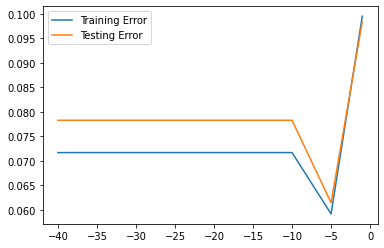

In [ ]:
Y1=[0.09948650132315712 ,0.05919654595938126,0.07169826920872237,0.07169879870215172,0.07169879870746175,0.07169879870746182 ]
X=[-1,-5,-10,-15,-20,-40]
Y2=[0.0983546945653303,0.061477099671273336,0.07828495534705615,0.07828559683109965,0.07828559683754142,0.07828559683754148]
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.legend(['Training Error','Testing Error'],loc='best')
plt.show()

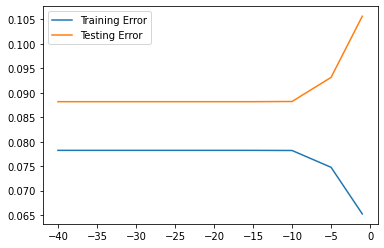

In [ ]:
Y1=[0.06523510932918765,0.07476397655945269,0.07820329591166465,0.07822835312660685,0.07822852205036462,0.0782285231962893]
X=[-1,-5,-10,-15,-20,-40]
Y2=[0.10564810778586653  ,0.09314651387751167 ,0.08821928063344782 ,0.08818070203157316 ,0.08818044182886374 ,0.08818044006372631 ]
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.legend(['Training Error','Testing Error'],loc='best')
plt.show()

In [ ]:
Y1=[0.05895262832405689,0.050291565622157426,0.043489114210130506,0.04023042852028591,0.03817306665221076,0.036200904296097514,0.03394482614862911,0.0315172778914993,0.029240652330973987,0.027435400001584273]
Y2=[0.05690191713048854,0.0576361669633989,0.0596022573220979,0.06129523771662415,0.06273548625185976,0.0640613100075020,0.06540707853851632,0.06692652739848017,0.0687517808088393,0.070960998631965]
X=[]